In [1]:
from src.utils.compare_solutions import load_competiton_solution, load_my_solution, load_my_solution_layer, plot_diff_heatmap, plot_one_unit, unpack_lp_solution
import numpy as np
import torch
import pickle

In [2]:
output_path = "../data/starting_kit_ai-uc_v2/Train_Data/instance_2021_Q1_1/OutputData.json"
ref_sol = load_competiton_solution(output_path)
my_solution_path ="../lp_solution.pkl"
with open(my_solution_path, "rb") as f:
    my_sol = pickle.load(f)


In [3]:
my_sol["thermal_units_names"] == ref_sol["thermal_units_names"]

True

In [4]:
my_sol["thermal_units_names"]

['gen_12c8d461',
 'gen_16b60ab4',
 'gen_179e9575',
 'gen_1eccc250',
 'gen_1fe20d30',
 'gen_204e519c',
 'gen_2155148b',
 'gen_2be55207',
 'gen_3223a28b',
 'gen_34b72ad1',
 'gen_3760182f',
 'gen_3ee144ad',
 'gen_3f6e6ecf',
 'gen_4e0ff615',
 'gen_528be175',
 'gen_5f4016ca',
 'gen_66a1dbb4',
 'gen_6917cd57',
 'gen_707f73ce',
 'gen_7402b65f',
 'gen_7aeb2c57',
 'gen_7fb5012b',
 'gen_809ce5b4',
 'gen_82daac85',
 'gen_8a0dcb92',
 'gen_916ef705',
 'gen_9b33322b',
 'gen_a06f1505',
 'gen_a21ecc31',
 'gen_a42b5872',
 'gen_a7876643',
 'gen_ab163f99',
 'gen_b42fba47',
 'gen_b4eba0b8',
 'gen_b6dbf4f8',
 'gen_b972a1dc',
 'gen_bc3de19e',
 'gen_bec834ae',
 'gen_c88f45e6',
 'gen_d520e1ee',
 'gen_d5aea532',
 'gen_d84b2d57',
 'gen_e2a0735e',
 'gen_e527ad06',
 'gen_ea4d2032',
 'gen_f0ebb407',
 'gen_f3e5828f',
 'gen_f573906b',
 'gen_f8b856d4',
 'gen_fde258d2',
 'gen_ff58fdf4']

In [5]:
ref_sol["profiled_units_names"]

['gen_0571fb7e',
 'gen_104628ae',
 'gen_110b94ce',
 'gen_3bf45d2b',
 'gen_41ff4c45',
 'gen_4483ff9f',
 'gen_58fd33ec',
 'gen_6c317c69',
 'gen_705f6062',
 'gen_78aab299',
 'gen_89e02819',
 'gen_a598da5d',
 'gen_d38f4a52',
 'gen_d4388bbd',
 'gen_fb5fa1a5',
 'solar',
 'wind']

In [6]:
for key, value in ref_sol.items():
    if key not in ["thermal_units_names", "profiled_units_names", "storage_units_names"]:
        a = ref_sol[key]
        b = my_sol[key] if isinstance(my_sol[key], np.ndarray) else my_sol[key].cpu().numpy()
        comparison = np.isclose(
            a, b, atol=1e-4
        )
        accuracy =100 * np.sum(comparison) / comparison.size
        print(f"Variable: {key}, Accuracy: {accuracy:.4f}")

Variable: profiled_generation, Accuracy: 100.0000
Variable: thermal_generation, Accuracy: 99.4281
Variable: charge_rate, Accuracy: 92.0635
Variable: discharge_rate, Accuracy: 93.5516
Variable: storage_level, Accuracy: 75.8929
Variable: curtailment, Accuracy: 100.0000


In [7]:
my_sol["curtailment"]

array([-0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
       -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
       -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
       -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
       -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
       -0., -0., -0., -0., -0., -0., -0.])

In [8]:
ref_sol["curtailment"]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0.])

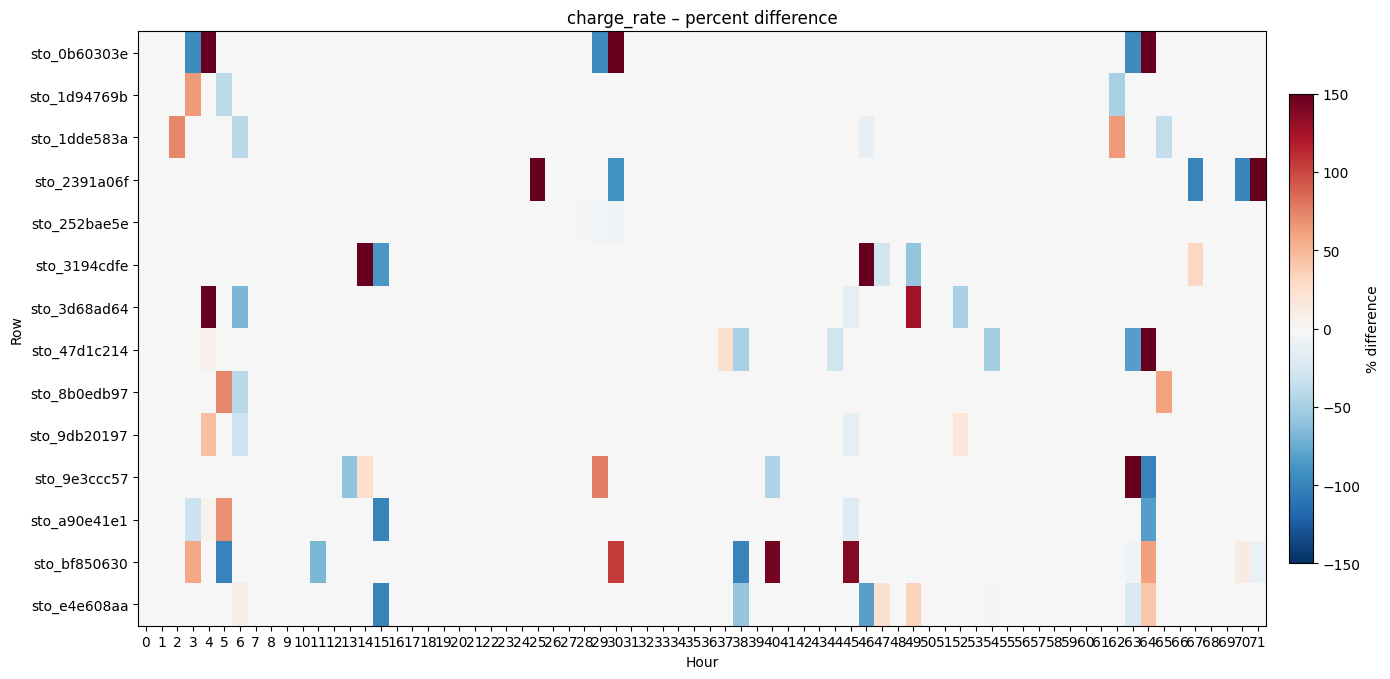

In [9]:
plot_diff_heatmap("charge_rate", my_sol, ref_sol)

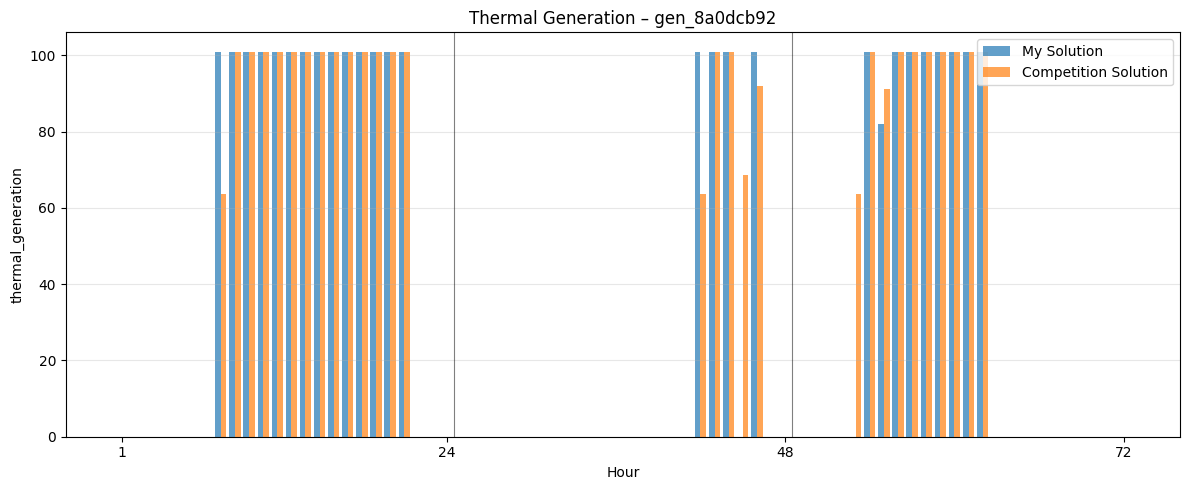

In [10]:
plot_one_unit("thermal_generation", "gen_8a0dcb92", my_sol, ref_sol)